# Homework # 2 AI 240 Machine Learning Course
### Instructor - Dr. Uma Gajendragadkar
## Learning Topic - Classification
### Dataset: Heart disease Prediction dataset
### Problem: Design and develop a Machine learning model that can help in making predictions that may be useful for doctors and healthcare providers to predict potential heart disease cases early on.
---
### Note: I was placed in Group 6 with Justin Bryant. Justin let me know he prefers to work alone. Rob Taylor and I typically exchange questions with one another, although we work on assignments independently. You can assume Rob Taylor is my Programming Partner for future assignments.

# Data Exploration: Understanding the dataset and key features.

## Import Python Libraries 

In [4]:
# import pandas for working with dataframes
import pandas as pd
# import train_test_split to split dataset into training and testing sets
from sklearn.model_selection import train_test_split
# import LogisticRegression to fit training data and make predictions on test data
from sklearn.linear_model import LogisticRegression
# import metrics class for confusion matrix to evaluate performance of classification model
from sklearn import metrics
# import numpy for calculating statistics
import numpy as np
# import matplotlib for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import StandardScaler for normalization of data
from sklearn.preprocessing import StandardScaler
# import classification_report to generate overview of model performance
from sklearn.metrics import classification_report

## Load Data

In [5]:
import pandas as pd
# load heart disease dataset into dataframe
heart = pd.read_csv('heart.csv')

## Review Data

In [6]:
# display first and last 5 rows of dataframe
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Dataset Description

# Data Preprocessing: Cleaning the data, handling missing values, and normalizing features.

## Count of unique and null values for each column

In [7]:
heart_unique_counts = heart.nunique()
heart_null_counts = heart.isnull().sum()
heart_summary = pd.DataFrame({'column_name': heart_unique_counts.index
                              , 'unique_count': heart_unique_counts.values
                              , 'null_count': heart_null_counts.values})
# print columns with unique and null counts
print(heart_summary)

   column_name  unique_count  null_count
0          age            41           0
1          sex             2           0
2           cp             4           0
3     trestbps            49           0
4         chol           152           0
5          fbs             2           0
6      restecg             3           0
7      thalach            91           0
8        exang             2           0
9      oldpeak            40           0
10       slope             3           0
11          ca             5           0
12        thal             4           0
13      target             2           0


## Normalize Data using Standardization 

In [8]:
# create dataframes with features separate from target
X = heart.drop(columns=['target'])
y = heart['target']

# initialize scaler
scaler = StandardScaler()
# fit and transform only feature data
standardized_X = scaler.fit_transform(X)

# create data frame with standardized features
standardized_X_df = pd.DataFrame(standardized_X, columns=X.columns)

# combine standardized features with target
standardized_heart_df = pd.concat([standardized_X_df, y.reset_index(drop=True)], axis=1)

In [15]:
# view dataframe after standardization
standardized_heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,0
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,0
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,1
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,0
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,0
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,1


# Modeling: Implementing and evaluating machine learning model - Logistic Regression

## Split data into Training and Testing sets

In [16]:
# split data into 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Instantiate the Model

In [17]:
# set max iterations to 1000 avoid total interactions reached error
heart_logreg = LogisticRegression(random_state=1, max_iter=1000)

# fit the mode with training data
heart_logreg.fit(X_train, y_train)

# store the predicted target variables from test data in y_pred
y_pred = heart_logreg.predict(X_test)

# Evaluation: Evaluate your model 

## Model Evaluation using Confusion Matrix

In [18]:
heart_conf_matrix = metrics.confusion_matrix(y_test, y_pred)
heart_conf_matrix

array([[80, 29],
       [10, 86]], dtype=int64)

## Heatmap for Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted Value')

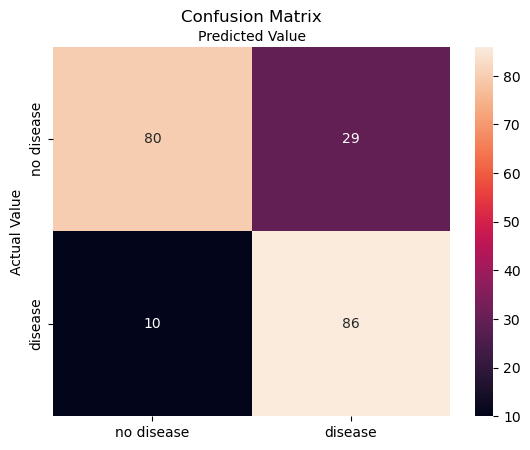

In [19]:
# set custom labels for classes 0 = No Disease, 1 = Heart Disease
class_names = ['no disease', 'disease']
# create figure and set of subplots
fig, ax = plt.subplots()

# create tick positions equal to the number of classes
tick_marks = np.arange(len(class_names))

# set ticks on x axis to custom class names
plt.xticks(tick_marks, class_names)
# set ticks on x axis to custom class names
plt.yticks(tick_marks, class_names)

# create dataframe from confusion matrix setting the index and columns to defined class names
heart_conf_df = pd.DataFrame(heart_conf_matrix, index=class_names, columns=class_names)

# create heatmap of dataframe with annotations
sns.heatmap(heart_conf_df, annot=True, ax=ax, fmt='g')

# move X label to top of matrix
ax.xaxis.set_label_position('top')

plt.title('Confusion Matrix')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

## Confusion Matrix Evaluation

### Report Accuracy, Precision, and Recall of Confusion Matrix

In [20]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

  no disease       0.89      0.73      0.80       109
     disease       0.75      0.90      0.82        96

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205

